In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install boruta
!pip install tqdm
!pip install imblearn
!pip install openpyxl
!pip install ipywidgets --upgrade
!pip install jupyter --upgrade
!pip install xgboost

In [ ]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

# rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#### Selección de variables con Boruta ####
import boruta 
from sklearn.ensemble import RandomForestClassifier

# Clusterings
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

# Elbow method en clustering
from tqdm.notebook import tqdm

### árbol de Decisión ###
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Naive Bayes ###
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

from xgboost import XGBClassifier

%matplotlib inline

# Carga de datos

In [2]:
### Importación de la Base de datos ###
# file = "/content/drive/My Drive/Proyecto SaturdaysAI - Prediccion de ludopatia/EstudioPrevalencia2015.xlsx"
file = './EstudioPrevalencia2015.xlsx'
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [4]:
df=xl.parse('BBDD fichero total')

In [5]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [6]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [7]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
                   'P13','P15A','P16A','P18A','P18B','P18C','P20','P21','P22','P24','P26',
                   'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
                   'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
                   'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
                  ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  return new_df

In [8]:
df_cleaned = cleanDataset(df)

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 53)


# Análisis descriptivo de los datos

In [9]:
df_cleaned.columns

Index(['P0R1', 'P0B', 'POB1', 'P0C', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P11', 'P13', 'P15A', 'P16A', 'P18A', 'P18B', 'P18C', 'P20', 'P21',
       'P22', 'P24', 'P26', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34',
       'P35', 'P38SP1', 'P38SP2', 'P38SP3', 'P38SP4', 'P38SP5', 'P38SP6',
       'P38SP7', 'P38SP8', 'P38SP9', 'P39', 'P41', 'P43', 'P46', 'DB0', 'DB1',
       'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'P23'],
      dtype='object')

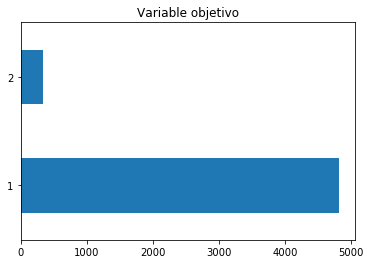

In [10]:
### Variable Objetivo ###
plot= df_cleaned['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

**Variable objetivo y comunidad autónoma**

In [11]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(df_cleaned['P23'], df_cleaned['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


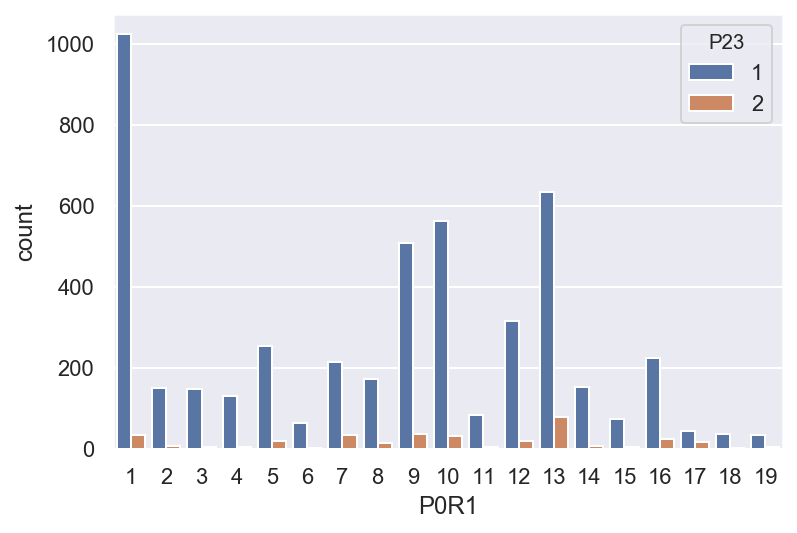

In [12]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=df_cleaned);

**Variable objetivo y edad**

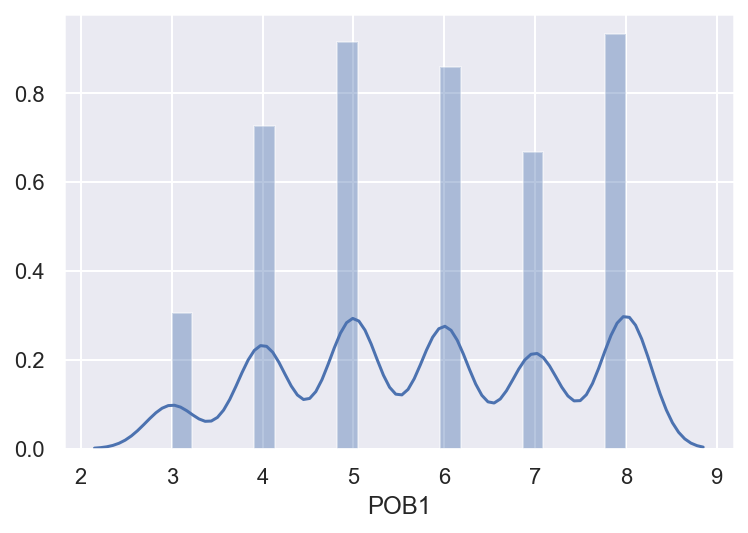

In [13]:
### Histograma de la edad ###
sns.distplot(df_cleaned['POB1'])

(array([ 357.,    0.,  850.,    0.,    0., 1071.,    0., 1006.,  783.,
        1092.]),
 array([1.09861229, 1.19669521, 1.29477814, 1.39286106, 1.49094399,
        1.58902692, 1.68710984, 1.78519277, 1.88327569, 1.98135862,
        2.07944154]),
 <a list of 10 Patch objects>)

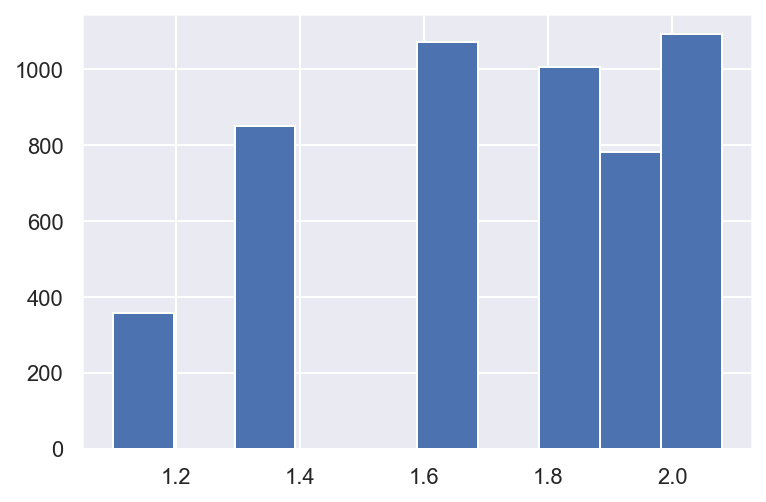

In [14]:
### Histograma ###
log_edad = np.log(df_cleaned['POB1'])
plt.hist(log_edad)

**Variable objetivo y sexo**

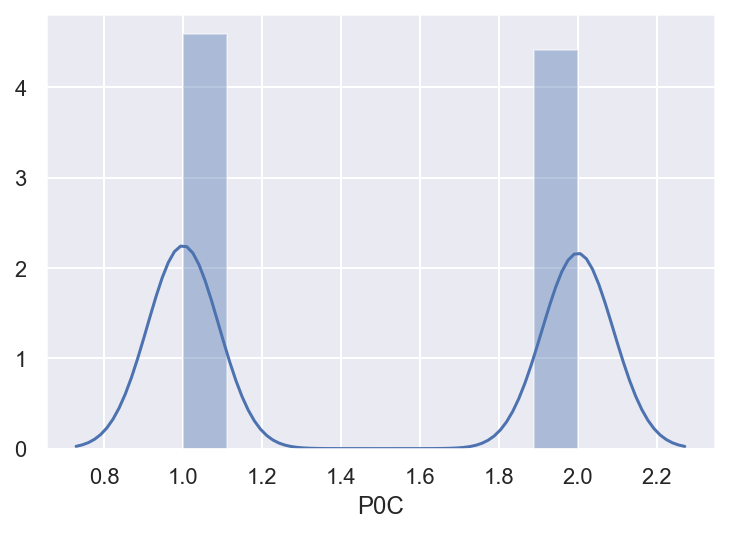

In [15]:
### Histograma del sexo ###
sns.distplot(df_cleaned['P0C'])

**Histograma estado de salud**

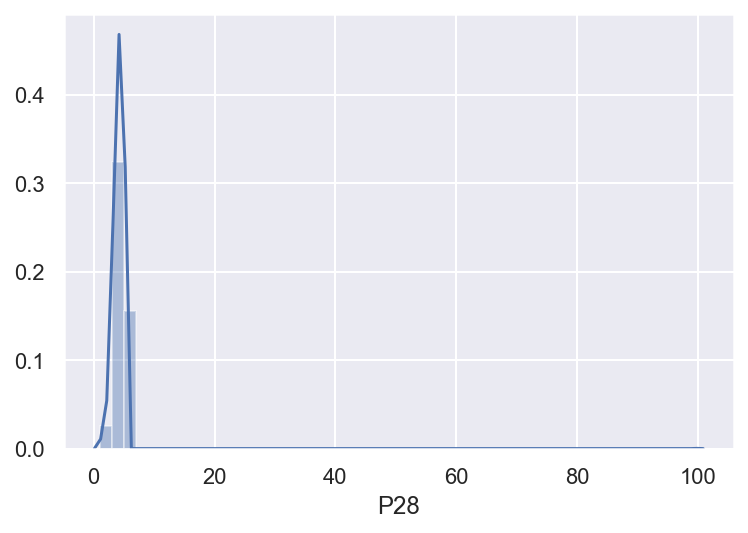

In [16]:
### Histograma Estado de Salud ###
sns.distplot(df_cleaned['P28'])

In [17]:
df_cleaned.head()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,1.0,1.0,1.0,5.0,2.0,1.0,...,7,4,2,1,4,2,2,1,3,1
1,3,5,6,1,1.0,1.0,2.0,5.0,1.0,2.0,...,8,3,4,5,5,1,1,1,1,1
2,4,5,8,2,1.0,1.0,2.0,5.0,2.0,1.0,...,9,2,4,100,100,4,5,1,4,1
3,5,5,7,2,1.0,1.0,1.0,5.0,2.0,2.0,...,11,3,1,100,100,2,3,1,3,1
4,5,5,6,2,1.0,1.0,1.0,5.0,2.0,1.0,...,9,3,1,3,5,2,3,1,3,1


In [18]:
df_cleaned.describe()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,...,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,2.237643,1.881179,2.444854,5.043807,2.396395,1.900950,...,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,9.893154,7.223864,9.208899,4.409402,7.541617,6.417858,...,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,...,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,...,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


**Eliminamos las variables nominales para realizar la matriz de correlaciones,
dejando solo las ordinales y las dicotómicas**

In [19]:
print('Antes de eliminar las variables nominales ', df_cleaned.shape)
df_without_nominales = df_cleaned.drop(columns=['P0R1','P0C','P6','P9','P13','DB1','DB5'])
print('Despues de eliminar las variables correladas ', df_without_nominales.shape)

Antes de eliminar las variables nominales  (5159, 53)
Despues de eliminar las variables correladas  (5159, 46)


**Matriz de correlaciones:**

,P0B,POB1,P3,P4,P5,P7,P8,P11,P15A,P16A,...,P41,P43,P46,DB0,DB3,DB4,DB6,DB7,DB8,P23
P0B,1.000000,0.020072,0.001049,0.045639,-0.009272,-0.000238,0.043731,-0.016987,-0.018716,-0.005132,...,-0.013326,0.000622,-0.038387,0.058840,0.009054,-0.005269,-0.023834,0.009841,-0.077258,0.005347
POB1,0.020072,1.000000,-0.013601,0.022152,0.133392,-0.015974,0.066052,0.381358,0.008925,-0.018015,...,-0.017626,0.011858,-0.136425,-0.399981,0.089617,-0.082659,0.610244,-0.087081,-0.280270,-0.005282
P3,0.001049,-0.013601,1.000000,0.419819,0.372549,0.118885,0.313168,-0.043227,-0.198154,-0.245334,...,-0.000984,-0.038983,-0.039561,-0.077573,-0.005585,-0.000338,0.010358,0.020960,0.026315,0.138608
P4,0.045639,0.022152,0.419819,1.000000,0.388475,0.099336,0.640485,-0.019391,-0.165018,-0.196265,...,-0.030705,-0.024927,-0.028393,-0.057501,0.025308,0.022380,0.026062,0.001467,-0.015772,0.136941
P5,-0.009272,0.133392,0.372549,0.388475,1.000000,0.171868,0.508904,-0.008458,-0.162000,-0.186428,...,0.012357,-0.030450,-0.057509,-0.099109,0.166697,0.118100,0.105486,0.017614,-0.043836,0.123000
P7,-0.000238,-0.015974,0.118885,0.099336,0.171868,1.000000,0.153690,0.001331,-0.025975,-0.051574,...,0.046104,0.012993,0.054519,0.012641,0.087024,0.086881,-0.028854,-0.026540,0.012212,0.045564
P8,0.043731,0.066052,0.313168,0.640485,0.508904,0.153690,1.000000,-0.030268,-0.161551,-0.192637,...,-0.029845,-0.024136,-0.040707,-0.094336,0.057579,0.045574,0.056697,-0.003712,-0.013388,0.130279
P11,-0.016987,0.381358,-0.043227,-0.019391,-0.008458,0.001331,-0.030268,1.000000,0.031059,0.024663,...,0.023642,0.026352,-0.024837,-0.181288,0.060316,0.018224,0.250645,-0.011996,-0.138126,0.011566
P15A,-0.018716,0.008925,-0.198154,-0.165018,-0.162000,-0.025975,-0.161551,0.031059,1.000000,0.394440,...,0.133177,0.283282,0.087582,0.030859,0.003234,0.013643,0.033199,-0.023984,0.040756,-0.243416
P16A,-0.005132,-0.018015,-0.245334,-0.196265,-0.186428,-0.051574,-0.192637,0.024663,0.394440,1.000000,...,0.082831,0.153772,0.084405,0.037898,0.003030,0.007532,0.000175,-0.003148,-0.003538,-0.226593


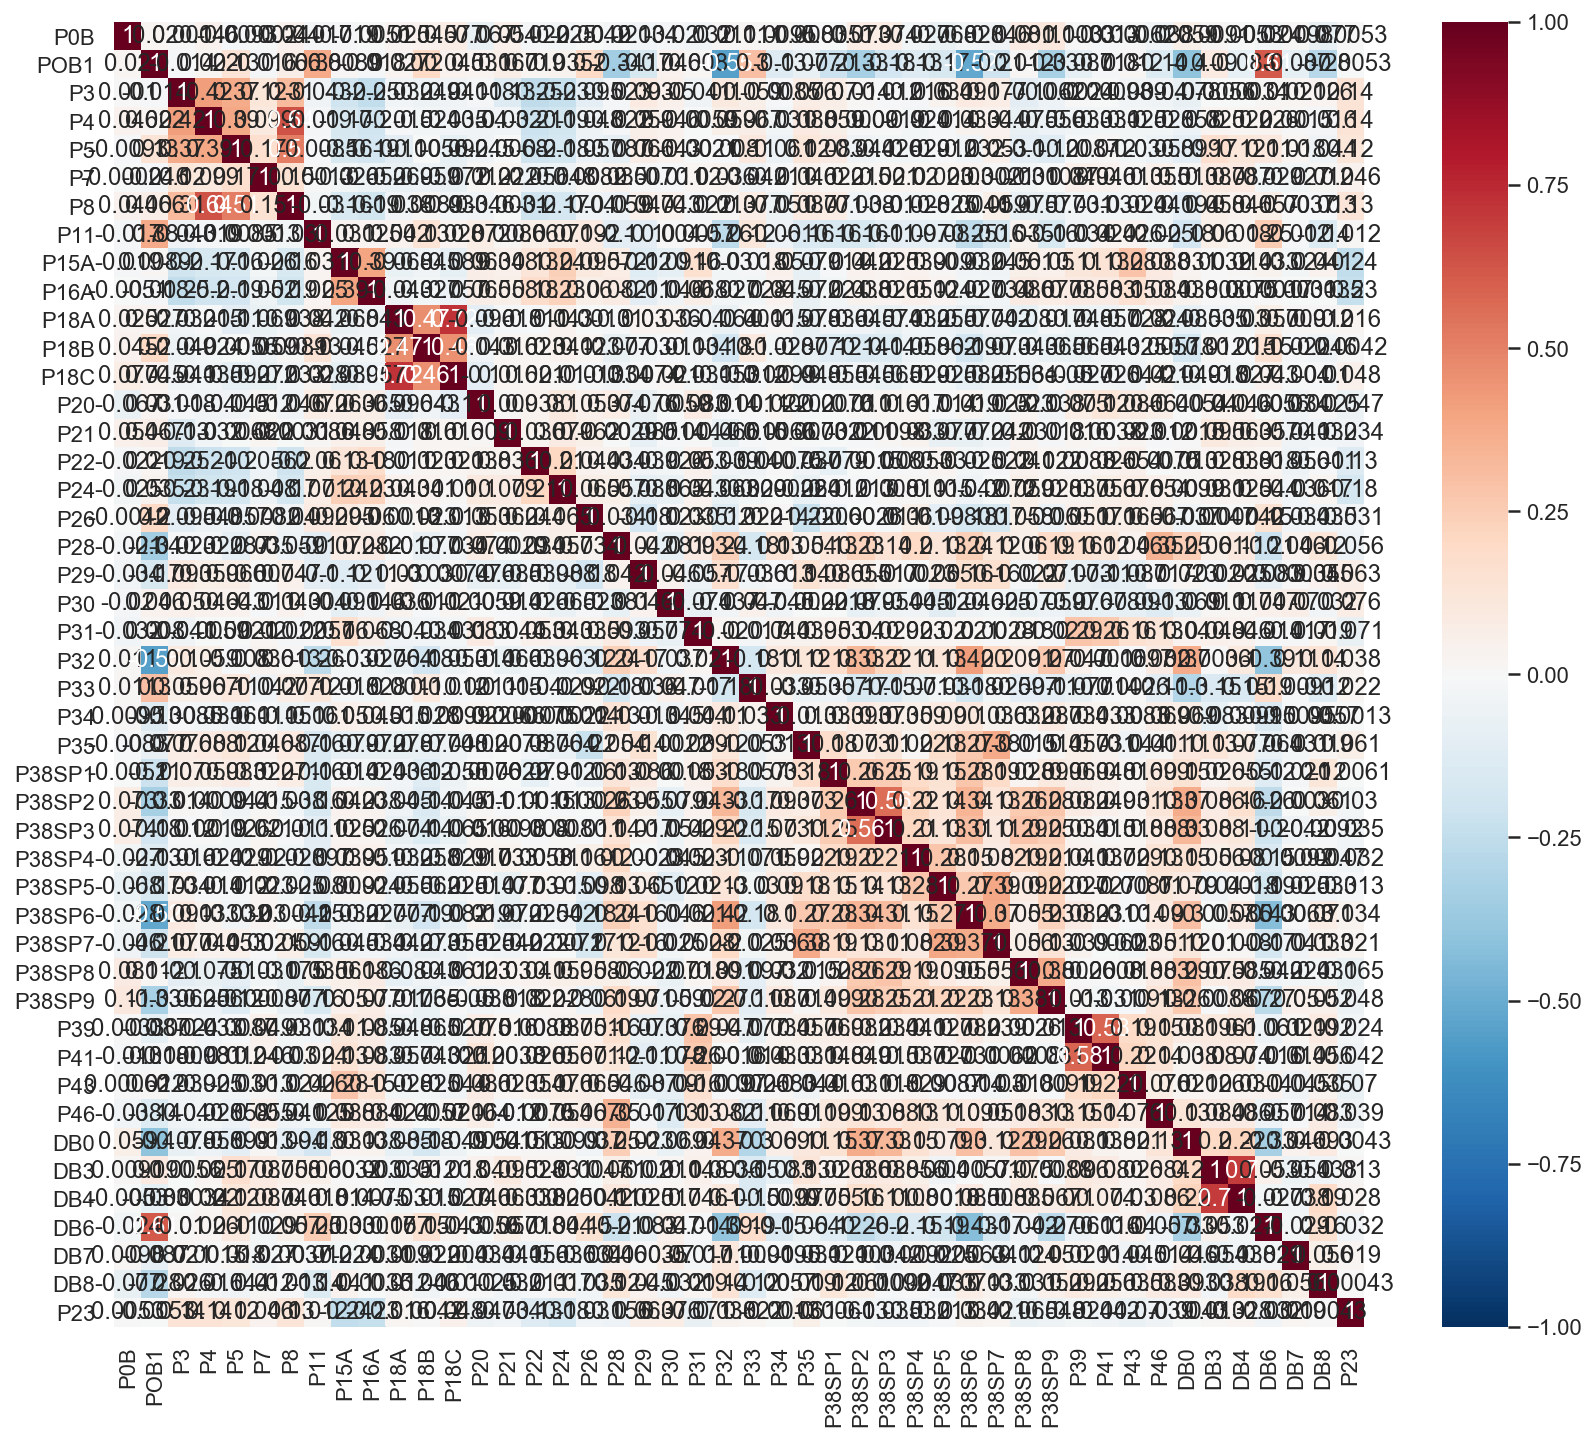

In [20]:
### Relaciones entre las features ###
correlation_spearman = df_without_nominales.corr(method = "spearman")
display(correlation_spearman)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation_spearman, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Nuevo data frame sin variables correladas:**

In [21]:
print('Antes de eliminar las variables correladas ', df_cleaned.shape)
df_without_correlations = df_cleaned.drop(columns=["P4","P5","P6","P11","P16A","P18B","P18C","P32","P38SP3","P38SP6","DB3","DB4","DB6"])
print('Despues de eliminar las variables correladas ', df_without_correlations.shape)

Antes de eliminar las variables correladas  (5159, 53)
Despues de eliminar las variables correladas  (5159, 40)


In [22]:
df_without_correlations["P23"].value_counts()

1    4820
2     339
Name: P23, dtype: int64

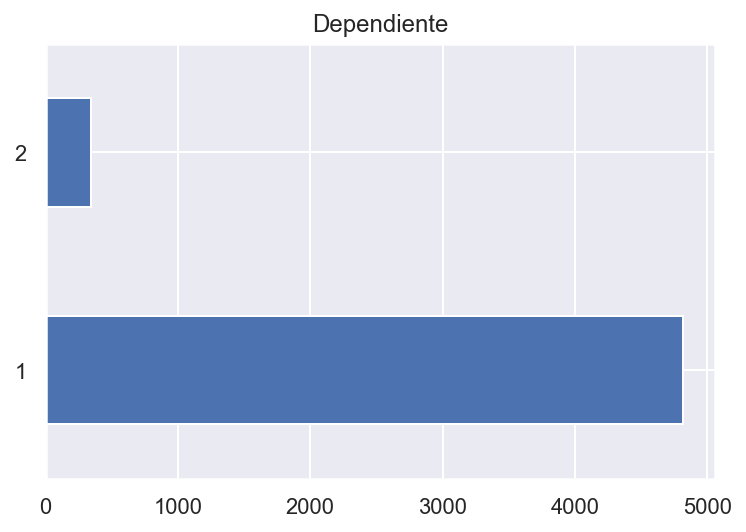

In [23]:
plot= df_without_correlations["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Creación de los conjuntos de Train y Test

In [24]:
y = df_without_correlations['P23']
X = df_without_correlations.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

X train Shape:  (3611, 39) ; Y train Shape:  (3611,)
X test Shape:  (1548, 39) ; Y test Shape:  (1548,)


# Generación de datos sintéticos
*Debido a que la varaible objetivo está desbalanceada

In [25]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_balanced_result, y_train_balanced_result = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_balanced_result)))

Distribution of class labels before resampling Counter({1: 3367, 2: 244})
Distribution of class labels after resampling Counter({1: 3365, 2: 3365})


In [26]:
X_train_balanced = pd.DataFrame(data=X_train_balanced_result, columns=X_train.columns)
y_train_balanced = pd.Series(data=y_train_balanced_result)   
# values | 1st column as index | 1st row as the column names

**Clase objetivo ANTES del balanceo:**

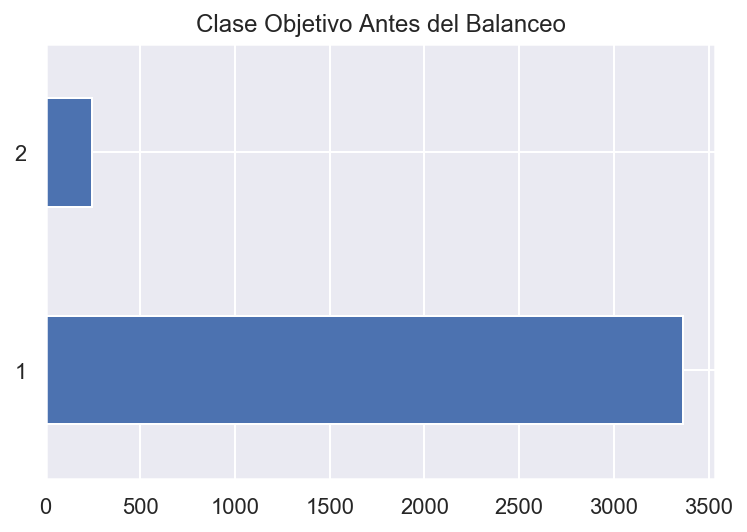

In [27]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

**Clase objetivo DESPUÉS del balanceo:**

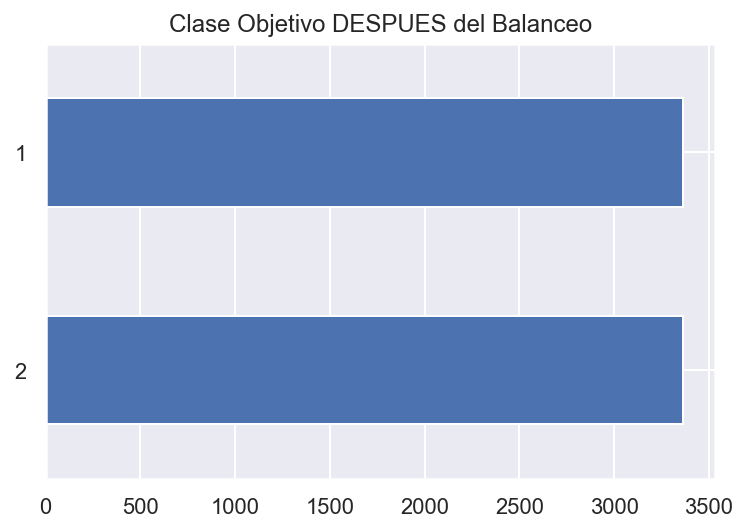

In [28]:
plot= y_train_balanced.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Seleccion de variables

## Método 1: Boruta

In [29]:
X_train_for_boruta=np.matrix(X_train)
y_train_for_boruta=np.transpose(np.ravel(np.matrix(y_train), order='C'))

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [30]:
boruta_selector = boruta.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_selector.fit(X_train_for_boruta, np.ravel(y_train_for_boruta, order='C'))

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	11
Tentative: 	12
Rejected: 	16
Iteration: 	9 / 50
Confirmed: 	11
Tentative: 	12
Rejected: 	16
Iteration: 	10 / 50
Confirmed: 	11
Tentative: 	12
Rejected: 	16
Iteration: 	11 / 50
Confirmed: 	11
Tentative: 	12
Rejected: 	16
Iteration: 	12 / 50
Confirmed: 	11
Tentative: 	12
Rejected: 	16
Iteration: 	13 / 50
Confirmed: 	11
Tentative: 	11
Rejected: 	17
Iteration: 	14 / 50
Confirmed: 	11
Tentative: 	11
Rejected: 	17
Iteration: 	15 / 50
Confirmed: 	11
Tentative: 	11
Rejected: 	17
Iteration: 	16 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=109, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x2518BE71678,
                                          verbose=0, warm_start=F

In [31]:
boruta_selector.ranking_

array([ 1,  7, 15, 19,  1,  1,  1, 10, 13,  1,  1,  6, 23,  1,  1, 23, 10,
        1,  7, 18, 12, 20,  1, 20,  3,  9,  2,  5,  1,  4, 25, 27, 25,  1,
       23, 15, 17, 28, 13])

In [32]:
print('Se han seleccionado ',boruta_selector.n_features_, ' variable del total de ',X_train_balanced.shape[1])

Se han seleccionado  12  variable del total de  39


In [33]:
features_boruta = list()
indexes = np.where(boruta_selector.support_ == True)
for x in np.nditer(indexes):
    features_boruta.append(X_train_balanced.columns.tolist()[x])
print(features_boruta)

['P0R1', 'P3', 'P7', 'P8', 'P15A', 'P18A', 'P22', 'P24', 'P29', 'P35', 'P38SP8', 'P46']


## Método 2: Análisis de componentes principales (PCA)

**Nota**:
Con el análisis de componentes principales se obtienen tantos componentes como dimensiones (número de variables) tengan los datos de entrada. Los componentes se ordenan de mayor a menor en función de la cantidad de varianza explicada por cada uno, y estan formados por una combinación específica de las variables originales.

Junto al PCA, también añado un SparsePCA, en la documentación de scikit-learn podemos entender por qué esto podría ser interesante para la selección de variables:

> "Principal component analysis (PCA) has the disadvantage that the components extracted by this method have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear combinations of the original variables. This can make interpretation difficult. (...)
> Sparse principal components yields a more parsimonious, interpretable representation, clearly emphasizing which of the original features contribute to the differences between samples."

[Referencia](https://scikit-learn.org/stable/modules/decomposition.html#sparse-principal-components-analysis-sparsepca-and-minibatchsparsepca)

In [34]:
RANDOM_STATE = 17  # Semilla para generar número aleatorio
scaler = StandardScaler()  # Estandarizamos los datos

# Seleccionamos el mínimo número de componentes para cubrir el 50% de la varianza:
pca = PCA(n_components=0.5, random_state=RANDOM_STATE)
# El parámetro alfa controla la «escasez» de componentes:
spar_pca = SparsePCA(alpha=0.2, random_state=RANDOM_STATE)

scaled_data = scaler.fit_transform(df_without_correlations.drop('P23', axis=1))
pca.fit(scaled_data)
spar_pca.fit(scaled_data)

num_components = pca.n_components_

print("Número total de componentes que explican el 50 pct de la varianza: %d" % num_components)
print("Porcentaje de varianza explicado por cada uno de los %d primeros componentes: \n" % num_components + str(pca.explained_variance_ratio_*100))

Número total de componentes que explican el 50 pct de la varianza: 13
Porcentaje de varianza explicado por cada uno de los 13 primeros componentes: 
[9.57781522 5.95071388 4.65916242 3.89898284 3.79133758 3.42695036
 3.20665866 3.08461727 3.07117756 2.94762942 2.79554499 2.73843585
 2.67731787]


**Visualizamos la proyección de la variable objetivo en los dos primeros componentes principales:**

        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.092126 -0.276732 -0.302652  0.226302  0.557933 -0.225795  0.429028   
1 -0.147205  0.202944  0.551919  0.394666 -1.594985  0.978674 -0.997433   
2 -0.708227  0.315577  1.409992 -1.253440 -2.220214  1.013404 -0.643772   
3 -1.059845 -0.028962  0.255531 -0.777038 -0.176551 -0.680967  0.281766   
4  0.326394 -0.417950 -0.073560 -0.706610 -0.039699 -0.587627  0.075359   

        pc8       pc9      pc10      pc11      pc12      pc13  
0 -0.109771 -0.539468 -0.104974 -0.661627  0.174312  0.423598  
1  1.029196  1.005693  0.001205  1.338827 -0.539597  1.435847  
2  0.430157  1.976864  0.864224  0.560500 -0.570094  1.617896  
3 -0.268890  0.507800  0.094088  0.256983  0.638003 -0.257497  
4 -0.101858 -0.036599 -0.292477  0.541239 -0.127828 -0.519172  


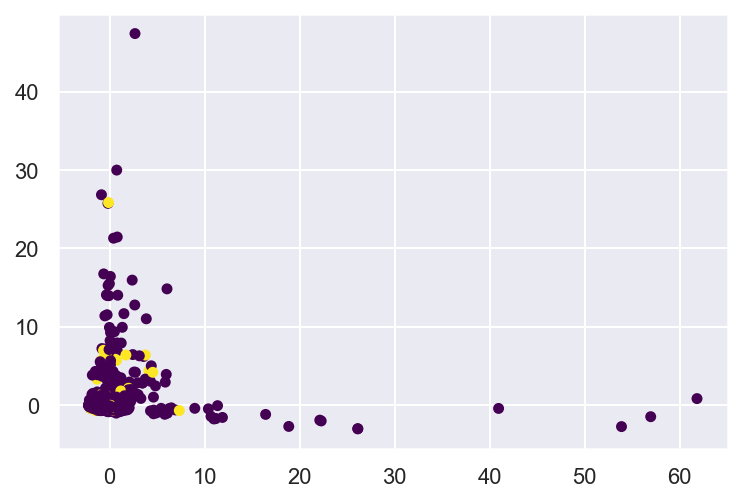

In [35]:
# Generamos un data frame con los Componentes Principales obtenidos
columns = ["pc%d" % i for i in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = columns)
print(pca_df.head())

plt.scatter(pca_df['pc1'], pca_df['pc2'], c=df_without_correlations['P23'].to_numpy(), s=20, cmap='viridis')

**Peso de cada una de las variables para PCA y SparsePCA:**

In [36]:
pca_components = pca.components_
spar_pca_components = spar_pca.components_

print("\nContribución de las variables para los PCA y SparsePCA:")
for i in range(num_components):
    print("PCA"+str(i)+"\n"+str(pca_components[i])+"\n"+str(spar_pca_components[i]))


Contribución de las variables para los PCA y SparsePCA:
PCA0
[ 0.01497119  0.0033732  -0.09260038 -0.02963501  0.00197141  0.06445607
  0.01003466  0.00823281 -0.01967416 -0.00455102 -0.05006863 -0.00251907
  0.02305315  0.00449978  0.00319141  0.09464963  0.05106363  0.06190581
  0.05880188  0.00923476 -0.0102125   0.12376473  0.06670037  0.36096807
  0.38943809  0.32798524  0.3923208   0.38879039  0.35153612  0.31593135
  0.00509401  0.00893042  0.00265588  0.01575071  0.04475476  0.0121826
  0.13616135  0.00154007  0.06809309]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]
PCA1
[ 0.01394175  0.00355728  0.03292817 -0.00701708  0.06164911  0.09175088
  0.03424385  0.06085734  0.02790247  0.17915546 -0.02614746  0.138168
  0.04967203  0.0794878   0.06386651  0.09062655 -0.00308176  0.04058731
  0.01573088  0.28165     0.23105879  0.03812295  0.05062516 -0.01343451
 -0.0123

**Variables obtenidas del SparsePCA:**

In [37]:
print("Indices distintos de 0: " + str(np.nonzero(spar_pca_components)[1][:num_components+2]))
features_pca = df_without_correlations.columns[np.nonzero(spar_pca_components)[1][:num_components+2]].tolist()
print("\nLista de variables seleccionadas con la configuración actual:\n" + str(features_pca))
df_pca_vars = df_without_correlations[features_pca]
df_pca_vars.head()

Indices distintos de 0: [23 30 35 22  5 13 34  2 13 34 19 33  0 10 29]

Lista de variables seleccionadas con la configuración actual:
['P38SP1', 'P39', 'DB1', 'P35', 'P7', 'P22', 'DB0', 'POB1', 'P22', 'DB0', 'P31', 'P46', 'P0R1', 'P18A', 'P38SP9']


,P38SP1,P39,DB1,P35,P7,P22,DB0,POB1,P22,DB0,P31,P46,P0R1,P18A,P38SP9
0,7,2,2,1,2.0,2.0,4,4,2.0,4,2,7,9,9,7
1,1,2,4,4,1.0,2.0,3,6,2.0,3,2,8,3,7,7
2,1,2,4,1,2.0,2.0,2,8,2.0,2,2,9,4,7,1
3,1,2,1,1,2.0,2.0,3,7,2.0,3,2,11,5,6,4
4,1,1,1,2,2.0,2.0,3,6,2.0,3,2,9,5,4,7


### Comparamos las variables obtenidas mediante PCA y Boruta:

In [38]:
SELECTION_PCA = "PCA"
SELECTION_BORUTA = "Boruta"
SELECTION_IN_COMMON ="InCommon"
executeMode = SELECTION_IN_COMMON

In [39]:
print('Comparamos los listados de features de los algoritmos de seleccion de variables: ')
print('PCA : ', features_pca)
print('Boruta : ', features_boruta)
features_in_common = sorted(set(features_pca).intersection(features_boruta))
print('Coinciden en los elementos: ',features_in_common)

Comparamos los listados de features de los algoritmos de seleccion de variables: 
PCA :  ['P38SP1', 'P39', 'DB1', 'P35', 'P7', 'P22', 'DB0', 'POB1', 'P22', 'DB0', 'P31', 'P46', 'P0R1', 'P18A', 'P38SP9']
Boruta :  ['P0R1', 'P3', 'P7', 'P8', 'P15A', 'P18A', 'P22', 'P24', 'P29', 'P35', 'P38SP8', 'P46']
Coinciden en los elementos:  ['P0R1', 'P18A', 'P22', 'P35', 'P46', 'P7']


## Clustering

#### Con el ARI(Rand Index Adjusted) vemos el grado de similitud entre los clusters.
Cuanto mayor sea el ARI siginifica que los clusters están más separados.

# Clustering

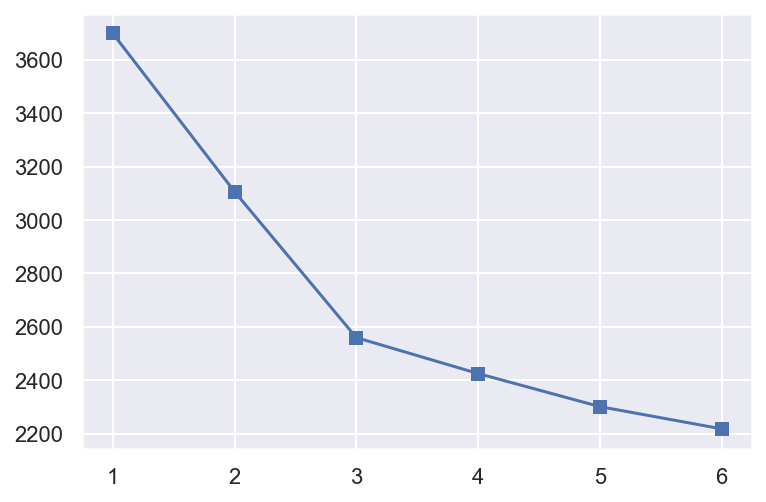

In [ ]:
inertia = []
kmeansList = []
MAX_NUMBER_CLUSTERS = 7
for k in tqdm(range(1, MAX_NUMBER_CLUSTERS + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE, n_jobs=1).fit(df_without_correlations.drop('P23', axis=1))
    kmeansList.append(kmeans)
    print('KMeans (',k,'): ARI =', metrics.adjusted_rand_score(df_without_correlations["P23"], kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

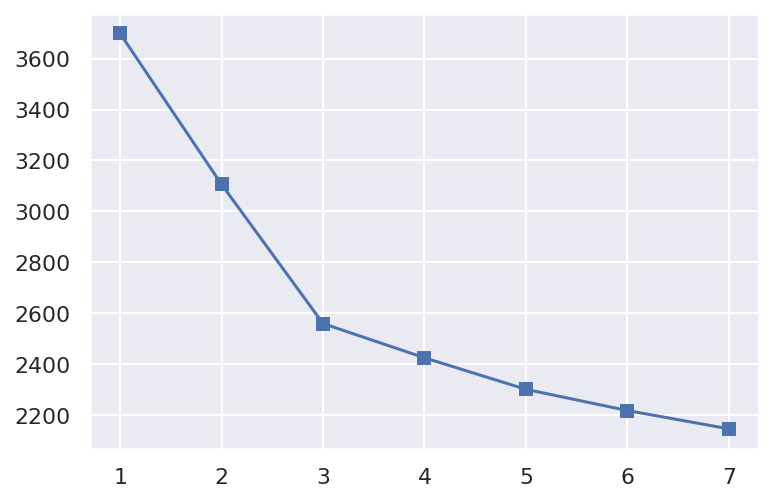

In [122]:
plt.plot(range(1, MAX_NUMBER_CLUSTERS + 1), inertia, marker='s');

In [124]:
for kmeans in kmeansList[1:]:
    tab = pd.crosstab(df_without_correlations["P23"], kmeans.labels_, margins=True)
    tab.index = ['Real 0', 'Real 1', 'Todos']
    print(tab.head())
    print('----------------')

col_0      0    1   All
Real 0  4386  434  4820
Real 1   305   34   339
Todos   4691  468  5159
----------------
col_0      0    1    2   All
Real 0  4059  411  350  4820
Real 1   285   26   28   339
Todos   4344  437  378  5159
----------------
col_0      0    1   2    3   All
Real 0  4059  350  84  327  4820
Real 1   285   28   6   20   339
Todos   4344  378  90  347  5159
----------------
col_0      0    1   2    3   4   All
Real 0  4006  342  74  314  84  4820
Real 1   279   27   8   19   6   339
Todos   4285  369  82  333  90  5159
----------------
col_0    0    1     2    3   4   5   All
Real 0  74  335  3974  309  84  44  4820
Real 1   8   27   274   19   6   5   339
Todos   82  362  4248  328  90  49  5159
----------------
col_0      0    1   2   3    4   5   6   All
Real 0  3959  307  43  21  335  84  71  4820
Real 1   269   19   5   5   27   6   8   339
Todos   4228  326  48  26  362  90  79  5159
----------------


In [ ]:
d = {}
for k in range(2, MAX_NUMBER_CLUSTERS):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [126]:
for n_classes in range(1, MAX_NUMBER_CLUSTERS+1):
    ag = AgglomerativeClustering(n_clusters=n_classes, linkage='ward').fit(df_without_correlations.drop('P23', axis=1))
    print('Agglomerative Clustering(',n_classes,'): ARI =', metrics.adjusted_rand_score(y, ag.labels_))

Agglomerative Clustering( 1 ): ARI = 0.0
Agglomerative Clustering( 2 ): ARI = -0.0028124279742106463
Agglomerative Clustering( 3 ): ARI = -0.0029579294932957734
Agglomerative Clustering( 4 ): ARI = 0.0047120344488525865
Agglomerative Clustering( 5 ): ARI = 0.004329935098133239
Agglomerative Clustering( 6 ): ARI = 0.020731792927753876
Agglomerative Clustering( 7 ): ARI = 0.02090203723794029


# Entrenamiento y Evaluación de Modelos

## Regresión Logística

In [44]:
def mostrar_resultados(y_test, pred_y, title):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title(title)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


### Ejecutamos el modelo de regresión
Modelo para variables obtenidas mediante Boruta, PCA o la combinación de ambas.

In [45]:
if executeMode == SELECTION_BORUTA: 
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_boruta], X_test[features_boruta], y_train_balanced, y_test)   
elif executeMode == SELECTION_PCA:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_pca], X_test[features_pca], y_train_balanced, y_test)   
elif executeMode == SELECTION_IN_COMMON:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_in_common], X_test[features_in_common], y_train_balanced, y_test)   
else :
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced, X_test, y_train_balanced, y_test)

### Mostramos las matrices de correlación y resultados de cada uno de ellos

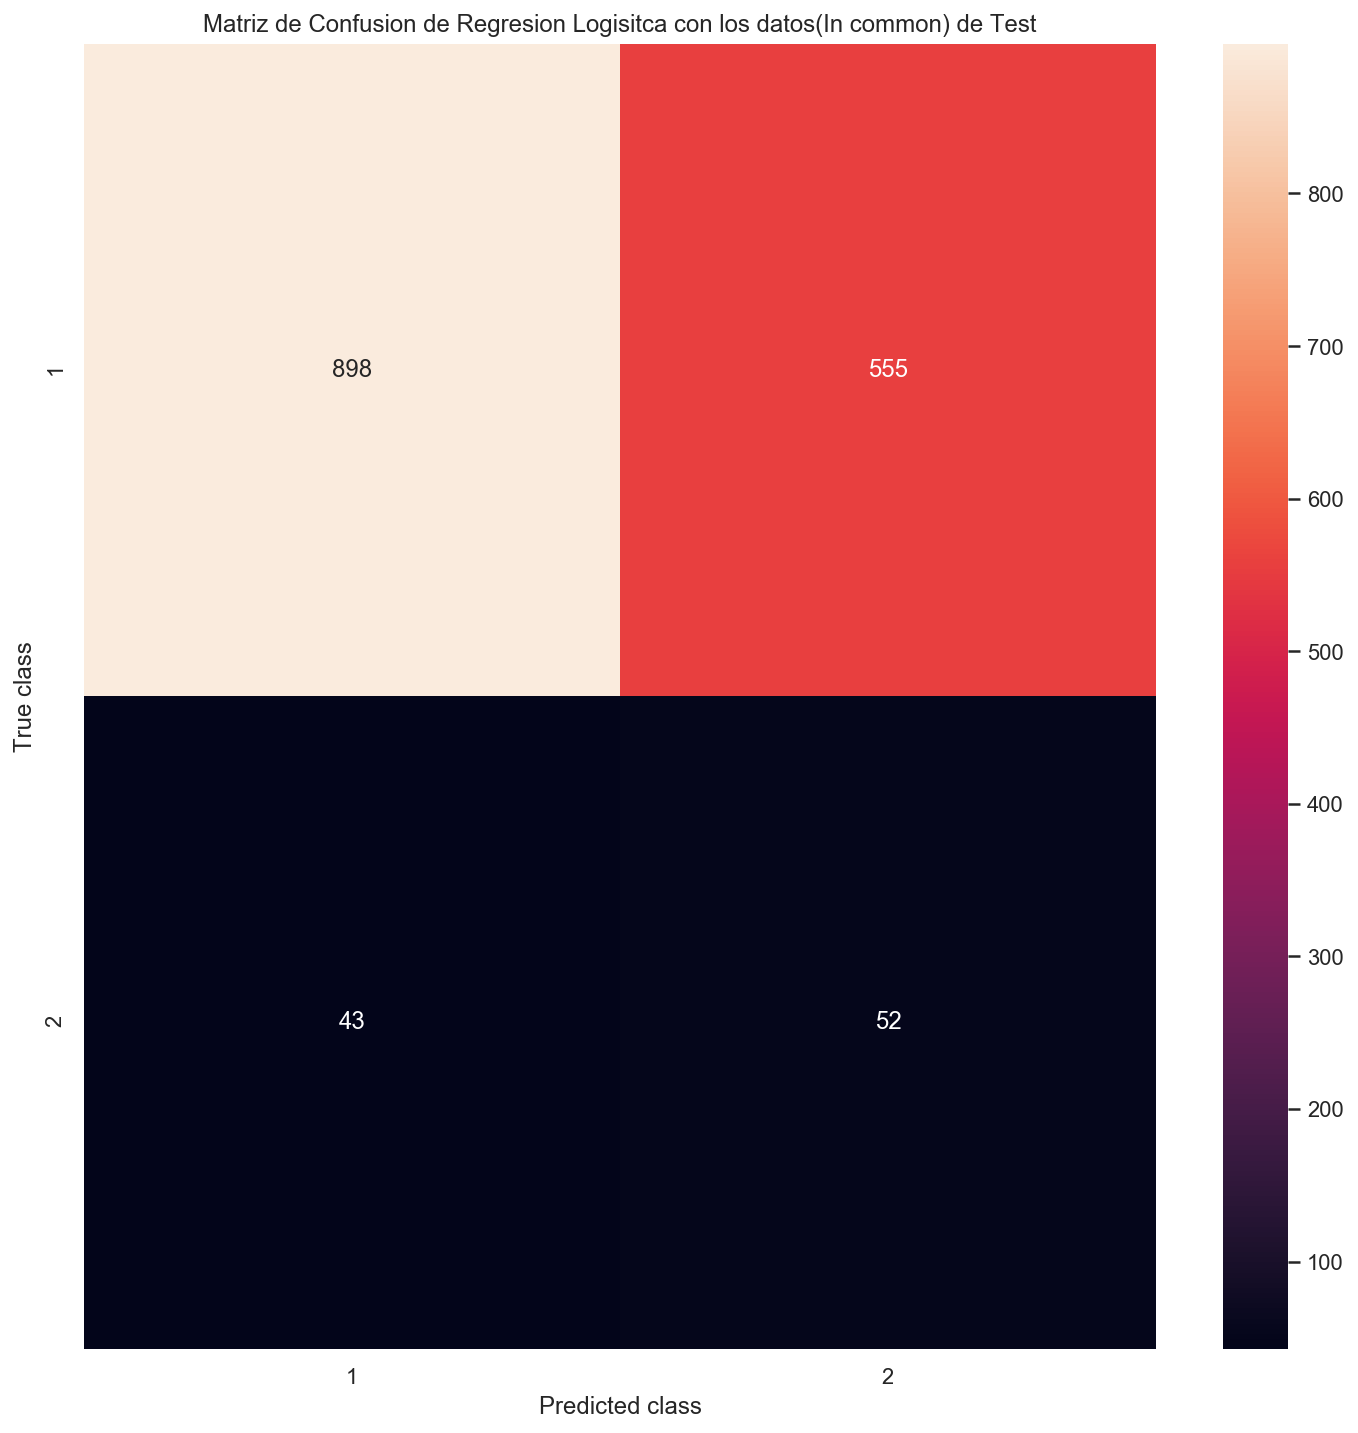

              precision    recall  f1-score   support

           1       0.95      0.62      0.75      1453
           2       0.09      0.55      0.15        95

    accuracy                           0.61      1548
   macro avg       0.52      0.58      0.45      1548
weighted avg       0.90      0.61      0.71      1548



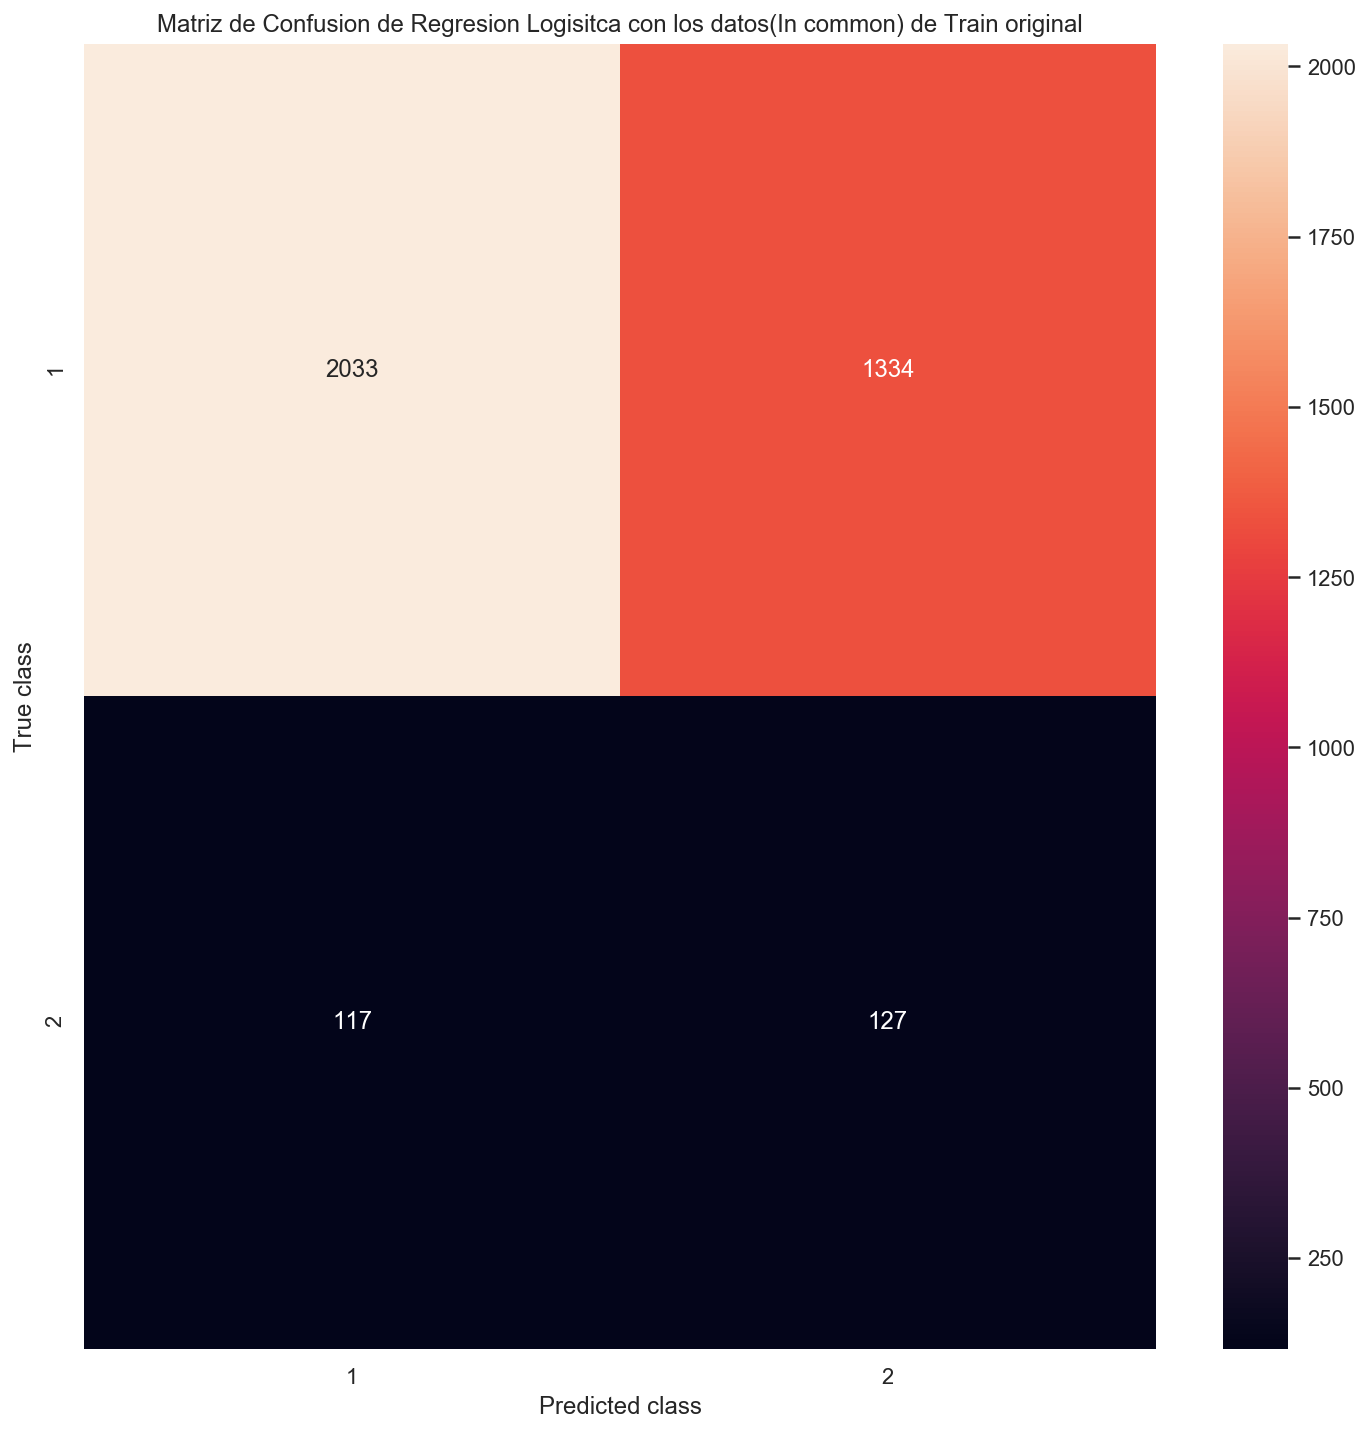

              precision    recall  f1-score   support

           1       0.95      0.60      0.74      3367
           2       0.09      0.52      0.15       244

    accuracy                           0.60      3611
   macro avg       0.52      0.56      0.44      3611
weighted avg       0.89      0.60      0.70      3611



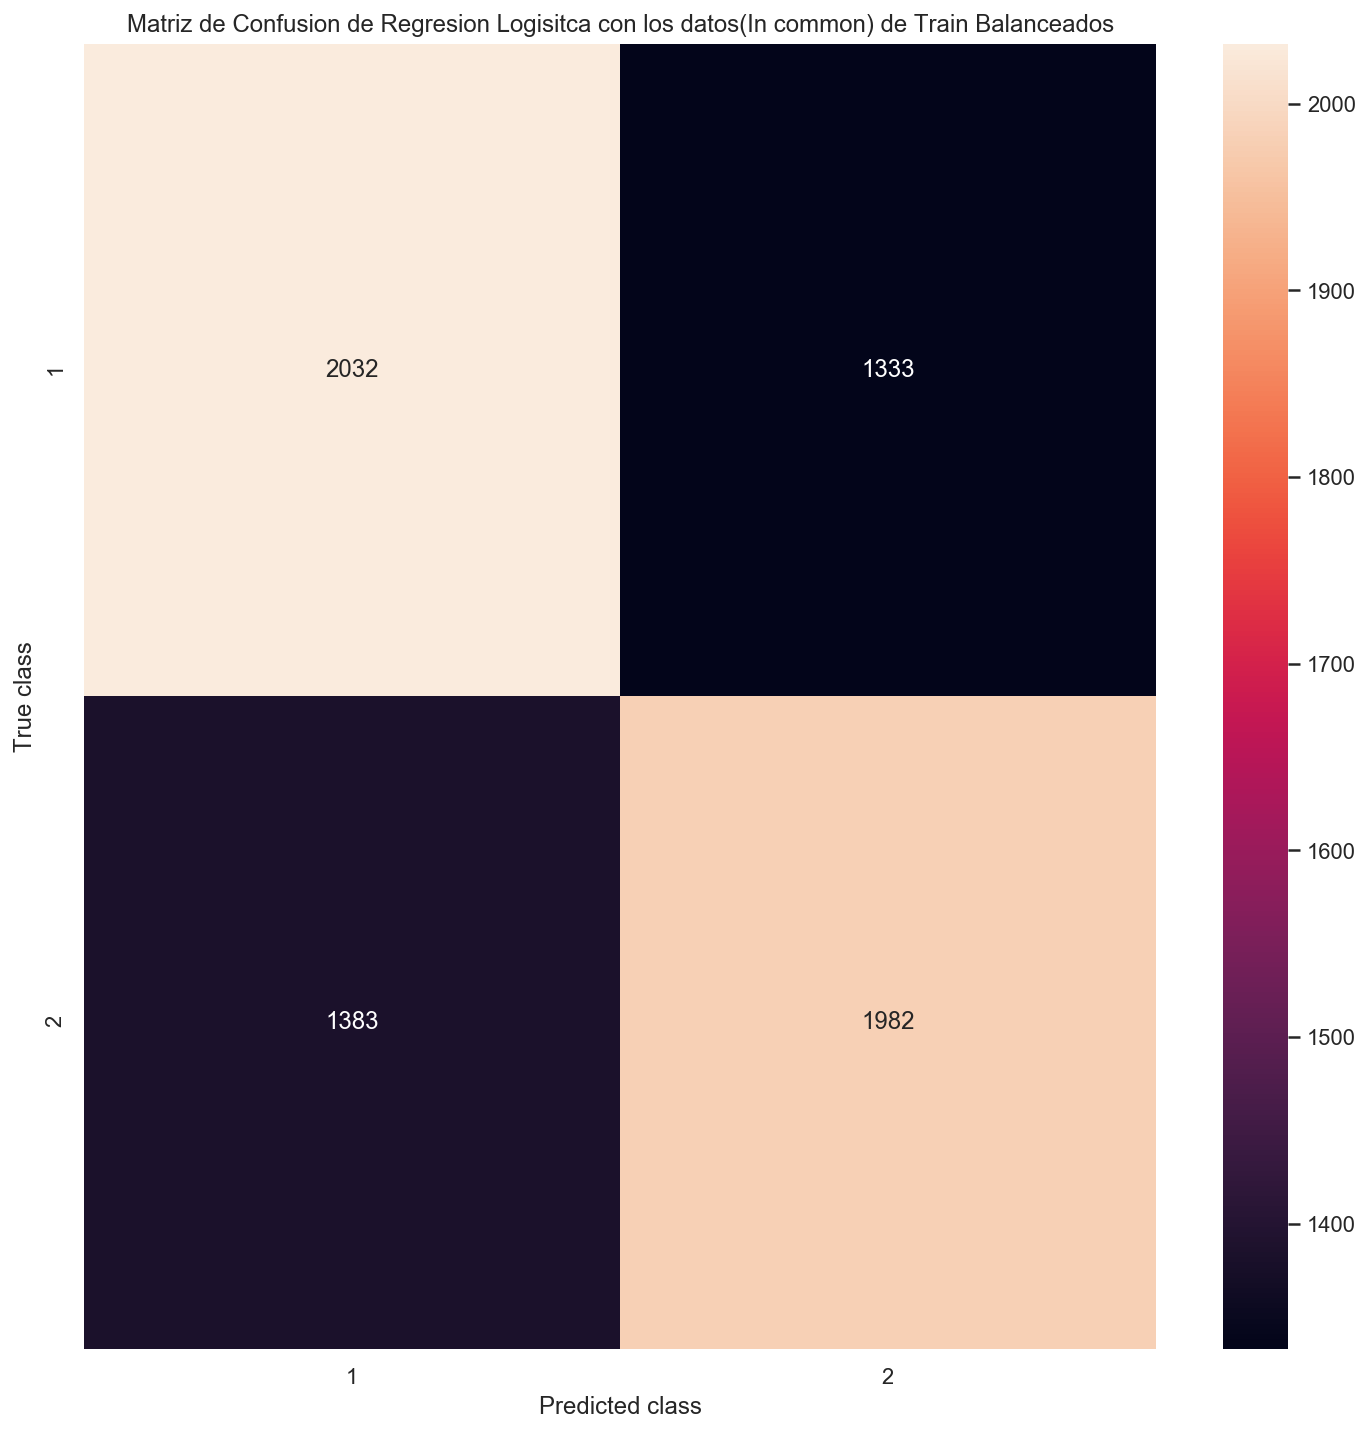

              precision    recall  f1-score   support

           1       0.60      0.60      0.60      3365
           2       0.60      0.59      0.59      3365

    accuracy                           0.60      6730
   macro avg       0.60      0.60      0.60      6730
weighted avg       0.60      0.60      0.60      6730



In [46]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train Balanceados")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train Balanceados")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train Balanceados")   
else :
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test), "Matriz de Confusion de Regresion Logisitca con los datos de Test")  
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train), "Matriz de Confusion de Regresion Logisitca con los datos de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced), "Matriz de Confusion de Regresion Logisitca con los datos de Train Balanceados")

## Decision Tree

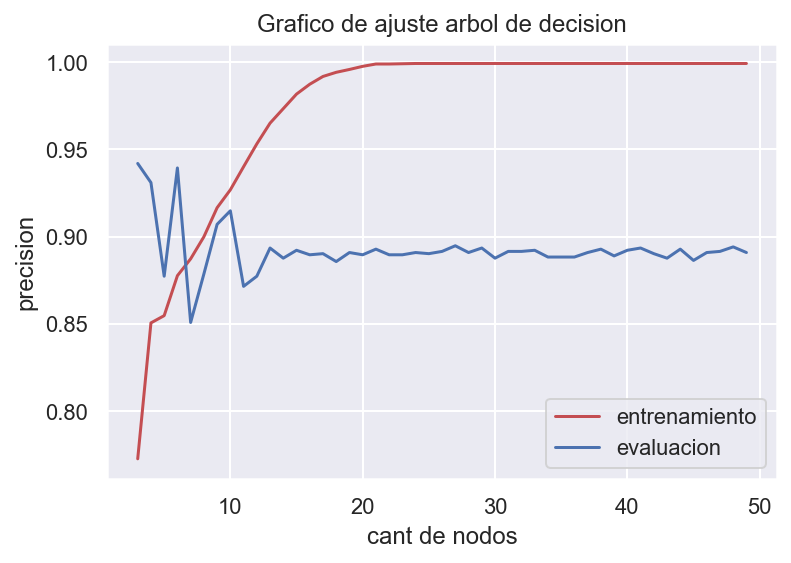

In [47]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 50))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train_balanced[features_boruta], y_train_balanced)
    train_prec.append(arbol3.score(X_train_balanced[features_boruta], y_train_balanced))
    eval_prec.append(arbol3.score(X_test[features_boruta], y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [48]:
tree = DecisionTreeClassifier (criterion="entropy",  random_state=99, max_depth=6)
tree.fit(X_train_balanced[features_boruta], y_train_balanced)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [49]:
pred_tree= tree.predict(X_test[features_boruta])
pred_tree

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
# MATRIZ DE CONFUSIÓN
actual = y_test
predicted = pred_tree
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

Confusion Matrix :
Predicción     1   2
Actual              
1           1439  14
2             80  15

Accuracy Score : 0.9392764857881137
Report : 
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      1453
           2       0.52      0.16      0.24        95

    accuracy                           0.94      1548
   macro avg       0.73      0.57      0.61      1548
weighted avg       0.92      0.94      0.92      1548



In [51]:
from sklearn.model_selection import cross_val_score

precision_cv_tree= cross_val_score(estimator=tree,X=X_train[features_boruta], y=y_train,
                                            cv=5, n_jobs=-1)

print('precisiones: {}'.format(precision_cv_tree))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision_cv_tree),
                                          np.std(precision_cv_tree)))

precisiones: [0.93084371 0.93351801 0.92936288 0.93351801 0.93628809]
Precision promedio:  0.933 +/-  0.002


## Random Forest

In [52]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    if executeMode == SELECTION_BORUTA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_boruta],X_test[features_boruta],y_train_balanced,y_test)
    elif executeMode == SELECTION_PCA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_pca],X_test[features_pca],y_train_balanced,y_test)
    elif executeMode == SELECTION_IN_COMMON:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_in_common],X_test[features_in_common],y_train_balanced,y_test)
    else: 
      my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [ ]:
 # fitting model with input max_leaf_nodes
model_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=0,  bootstrap = True,verbose=2, max_features = 'sqrt')

# fitting the model with training dataset
if executeMode  == SELECTION_BORUTA:
  model_forest_classifier.fit(X_train_balanced[features_boruta], y_train_balanced)
elif executeMode == SELECTION_PCA:
  model_forest_classifier.fit(X_train_balanced[features_pca], y_train_balanced)
elif executeMode == SELECTION_IN_COMMON:
  model_forest_classifier.fit(X_train_balanced[features_in_common], y_train_balanced)
else :
  model_forest_classifier.fit(X_train_balanced, y_train_balanced)

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_boruta]), "Random Forest con los datos(Boruta) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_boruta]), "Random Forest con los datos(Boruta) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_boruta]), "Random Forest con los datos(Boruta) de Train originales")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_pca]), "Random Forest con los datos(PCA) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_pca]), "Random Forest con los datos(PCA) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_pca]), "Random Forest con los datos(Pca) de Train originales")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_in_common]), "Random Forest con los datos(In common) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_in_common]), "Random Forest con los datos(In common) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_in_common]), "Random Forest con los datos(In common) de Train originales")    
else :
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test), "Random Forest con los datos de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced), "Random Forest con los datos de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train), "Random Forest con los datos de Train originales")

## Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train[features_boruta].values,y_train)

print('Precisión en el set de Entrenamiento:{:.2f}'.format(gnb.score(X_train[features_boruta],y_train)))
print('Precisión en el set de Test:{:.2f}'.format(gnb.score(X_test[features_boruta],y_test)))

In [ ]:
pred_gnb= gnb.predict(X_test[features_boruta])
pred_gnb

In [ ]:
# MATRIZ DE CONFUSIÓN NAÏVE BAYES 
actual = y_test
predicted = pred_gnb
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

## XGBoost

In [ ]:
xgb_model = XGBClassifier(max_depth=40)

xgb_model.fit(X_train_balanced[features_boruta], y_train_balanced)
pred_xgb=xgb_model.predict(X_test[features_boruta])


In [ ]:
## Matriz de Confusión ###
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test
predicted = pred_xgb
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )